In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns

In [2]:
datos=pd.read_csv('Lotoideas.com - Histórico de Resultados - Euromillones - 2004 a 2024.csv')

Visualizar los primeros registros para entender la estructura de los datos

In [3]:
datos.head(2)

,FECHA,COMB. GANADORA,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,ESTRELLAS,Unnamed: 7
0,2/01/2024,7,15,18,46,49,10,12
1,29/12/2023,2,3,19,36,37,6,9


In [4]:
datos.columns

Index(['FECHA', 'COMB. GANADORA', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'ESTRELLAS', 'Unnamed: 7'],
      dtype='object')

In [5]:
# Omitir las primeras filas y redefinir nombres de columnas
datos = pd.read_csv('Lotoideas.com - Histórico de Resultados - Euromillones - 2004 a 2024.csv', skiprows=1, names=['FECHA', 'Numero1', 'Numero2', 'Numero3', 'Numero4', 'Numero5', 'Estrella1', 'Estrella2'])

# Mostrar los primeros registros para verificar la estructura de los datos
print(datos.head())

        FECHA  Numero1  Numero2  Numero3  Numero4  Numero5  Estrella1  \
0   2/01/2024        7       15       18       46       49         10   
1  29/12/2023        2        3       19       36       37          6   
2  26/12/2023        8       27       30       35       47          9   
3  22/12/2023        6       14       34       44       49          4   
4  19/12/2023       10       20       41       43       45          2   

   Estrella2  
0         12  
1          9  
2         10  
3         12  
4         12  


Resumen estadístico básico

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FECHA      1699 non-null   object
 1   Numero1    1699 non-null   int64 
 2   Numero2    1699 non-null   int64 
 3   Numero3    1699 non-null   int64 
 4   Numero4    1699 non-null   int64 
 5   Numero5    1699 non-null   int64 
 6   Estrella1  1699 non-null   int64 
 7   Estrella2  1699 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 106.3+ KB


In [7]:
datos.describe()

,Numero1,Numero2,Numero3,Numero4,Numero5,Estrella1,Estrella2
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,8.469099,16.849912,25.306062,34.088287,42.596233,4.062390,7.963508
std,6.620236,8.175732,8.672990,8.380482,6.665357,2.552094,2.640597
min,1.000000,2.000000,5.000000,9.000000,16.000000,1.000000,1.000000
25%,3.000000,10.000000,19.000000,28.000000,39.000000,2.000000,6.000000
50%,7.000000,16.000000,25.000000,35.000000,44.000000,3.000000,8.000000
75%,12.000000,23.000000,32.000000,40.500000,48.000000,6.000000,10.000000
max,38.000000,44.000000,47.000000,49.000000,50.000000,11.000000,12.000000


Primer Visualizacion

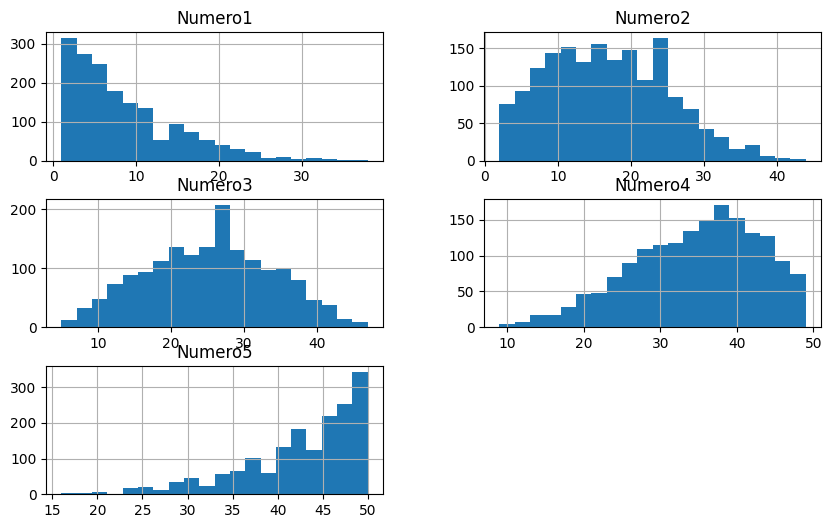

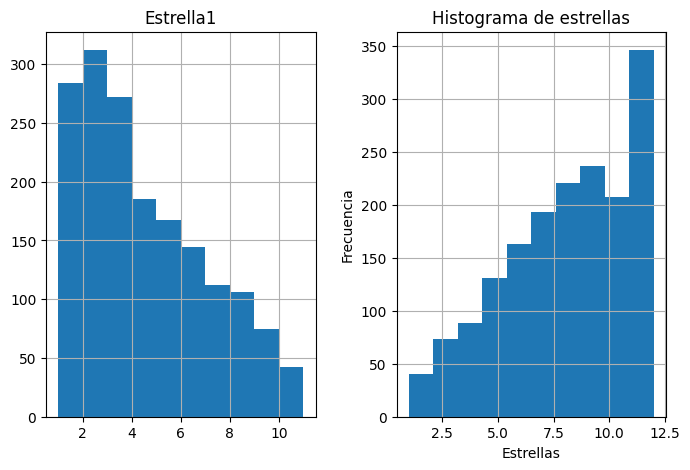

In [8]:
import matplotlib.pyplot as plt

# Histograma para los números
datos.iloc[:, 1:6].hist(bins=20, figsize=(10, 6))
plt.xlabel('Números')
plt.ylabel('Frecuencia')
plt.title('Histograma de números')
plt.show()

# Histograma para las estrellas
datos.iloc[:, 6:].hist(bins=10, figsize=(8, 5))
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.title('Histograma de estrellas')
plt.show()


In [ ]:
datos.head(1)

In [9]:
# Seleccionar las columnas que contienen los números
numeros = datos[['Numero1', 'Numero2', 'Numero3', 'Numero4', 'Numero5']]

# Obtener la frecuencia de cada número
frecuencia_numeros = numeros.stack().value_counts().sort_index()

print(frecuencia_numeros)


1     166
2     158
3     169
4     170
5     179
6     168
7     170
8     154
9     159
10    183
11    171
12    173
13    167
14    173
15    177
16    164
17    185
18    145
19    191
20    179
21    194
22    136
23    193
24    168
25    181
26    184
27    179
28    166
29    182
30    171
31    162
32    160
33    146
34    171
35    174
36    159
37    182
38    184
39    165
40    157
41    147
42    188
43    163
44    192
45    173
46    144
47    152
48    164
49    168
50    189
Name: count, dtype: int64


In [11]:
# Seleccionar las columnas que contienen las estrellas
estrellas = datos[['Estrella1', 'Estrella2']]

# Obtener la frecuencia de cada estrella
frecuencia_estrellas = estrellas.stack().value_counts().sort_index()

print(frecuencia_estrellas)


1     291
2     345
3     345
4     273
5     298
6     307
7     305
8     327
9     312
10    237
11    233
12    125
Name: count, dtype: int64


In [12]:
from itertools import combinations

# Obtener todas las combinaciones únicas de números por sorteo
all_combinations = []
for idx, row in datos.iterrows():
    numeros_sorteo = sorted(row[['Numero1', 'Numero2', 'Numero3', 'Numero4', 'Numero5']])
    unique_combinations = list(combinations(numeros_sorteo, 2))  # Cambia el número aquí para ajustar la longitud de la combinación
    all_combinations.extend(unique_combinations)

# Contar la frecuencia de cada combinación
frecuencia_combinaciones = pd.Series(all_combinations).value_counts()

# Obtener las combinaciones más comunes y sus frecuencias
combinaciones_mas_comunes = frecuencia_combinaciones.head(10)  # Puedes ajustar el número de combinaciones más comunes aquí

print("Las combinaciones más comunes son:")
print(combinaciones_mas_comunes)


Las combinaciones más comunes son:
(1, 48)     26
(15, 28)    26
(24, 26)    25
(4, 23)     25
(3, 50)     25
(39, 44)    24
(26, 49)    24
(12, 19)    24
(23, 32)    24
(5, 25)     24
Name: count, dtype: int64


In [13]:
from itertools import combinations

# Obtener todas las combinaciones únicas de números por sorteo
all_combinations = []
for idx, row in datos.iterrows():
    numeros_sorteo = sorted(row[['Numero1', 'Numero2', 'Numero3', 'Numero4', 'Numero5']])
    unique_combinations = list(combinations(numeros_sorteo, 3))  # Cambia el número aquí para ajustar la longitud de la combinación
    all_combinations.extend(unique_combinations)

# Contar la frecuencia de cada combinación
frecuencia_combinaciones = pd.Series(all_combinations).value_counts()

# Obtener los tríos más comunes y sus frecuencias
trios_mas_comunes = frecuencia_combinaciones.head(10)  # Puedes ajustar el número de tríos más comunes aquí

print("Los tríos más comunes son:")
print(trios_mas_comunes)


Los tríos más comunes son:
(10, 19, 23)    6
(23, 24, 26)    6
(13, 17, 21)    6
(3, 13, 42)     6
(19, 25, 44)    6
(25, 39, 44)    5
(6, 48, 50)     5
(25, 38, 41)    5
(2, 10, 22)     5
(20, 30, 38)    5
Name: count, dtype: int64


In [14]:
from itertools import combinations

# Obtener todas las combinaciones únicas de números por sorteo
all_combinations = []
for idx, row in datos.iterrows():
    numeros_sorteo = sorted(row[['Numero1', 'Numero2', 'Numero3', 'Numero4', 'Numero5']])
    unique_combinations = list(combinations(numeros_sorteo, 4))  # Cambia el número aquí para ajustar la longitud de la combinación
    all_combinations.extend(unique_combinations)

# Contar la frecuencia de cada combinación
frecuencia_combinaciones = pd.Series(all_combinations).value_counts()

# Obtener los cuartetos más comunes y sus frecuencias
cuartetos_mas_comunes = frecuencia_combinaciones.head(10)  # Puedes ajustar el número de cuartetos más comunes aquí

print("Los cuartetos más comunes son:")
print(cuartetos_mas_comunes)


Los cuartetos más comunes son:
(19, 25, 30, 44)    2
(29, 32, 36, 41)    2
(7, 11, 46, 50)     2
(19, 31, 39, 48)    2
(34, 38, 43, 45)    2
(23, 42, 43, 49)    2
(5, 9, 19, 21)      2
(17, 28, 35, 47)    2
(18, 39, 43, 47)    2
(15, 25, 40, 41)    2
Name: count, dtype: int64


In [15]:
from itertools import combinations

# Obtener todas las combinaciones únicas de números y estrellas por sorteo
all_combinations = []
for idx, row in datos.iterrows():
    numeros_sorteo = sorted(row[['Numero1', 'Numero2', 'Numero3', 'Numero4', 'Numero5']])
    estrellas_sorteo = sorted(row[['Estrella1', 'Estrella2']])
    
    # Combinaciones de tríos de números junto con estrellas
    unique_combinations = list(combinations(numeros_sorteo, 3))  # Cambia el número aquí para ajustar la longitud de la combinación
    for comb in unique_combinations:
        all_combinations.append(comb + tuple(estrellas_sorteo))

# Contar la frecuencia de cada combinación
frecuencia_combinaciones = pd.Series(all_combinations).value_counts()

# Obtener los tríos junto con estrellas más comunes y sus frecuencias
trios_estrellas_mas_comunes = frecuencia_combinaciones.head(10)  # Puedes ajustar el número de tríos más comunes aquí

print("Los tríos junto con estrellas más comunes son:")
print(trios_estrellas_mas_comunes)


Los tríos junto con estrellas más comunes son:
(10, 31, 42, 2, 5)     3
(1, 6, 12, 2, 7)       2
(36, 42, 46, 2, 8)     2
(3, 26, 45, 7, 10)     2
(5, 27, 42, 1, 6)      2
(17, 27, 49, 3, 5)     2
(25, 26, 44, 3, 7)     2
(25, 28, 40, 1, 6)     2
(3, 6, 24, 5, 8)       2
(15, 21, 23, 3, 12)    2
Name: count, dtype: int64


In [16]:
from itertools import combinations

# Obtener todas las combinaciones únicas de números y estrellas por sorteo
all_combinations = []
for idx, row in datos.iterrows():
    numeros_sorteo = sorted(row[['Numero1', 'Numero2', 'Numero3', 'Numero4', 'Numero5']])
    estrellas_sorteo = sorted(row[['Estrella1', 'Estrella2']])
    
    # Combinaciones de cuartetos de números junto con estrellas
    unique_combinations = list(combinations(numeros_sorteo, 4))  # Cambia el número aquí para ajustar la longitud de la combinación
    for comb in unique_combinations:
        all_combinations.append(comb + tuple(estrellas_sorteo))

# Contar la frecuencia de cada combinación
frecuencia_combinaciones = pd.Series(all_combinations).value_counts()

# Obtener los cuartetos junto con estrellas más comunes y sus frecuencias
cuartetos_estrellas_mas_comunes = frecuencia_combinaciones.head(10)  # Puedes ajustar el número de cuartetos más comunes aquí

print("Los cuartetos junto con estrellas más comunes son:")
print(cuartetos_estrellas_mas_comunes)


Los cuartetos junto con estrellas más comunes son:
(30, 42, 45, 49, 5, 10)    2
(12, 37, 40, 50, 1, 2)     2
(17, 35, 41, 45, 1, 5)     2
(3, 34, 38, 48, 5, 8)      2
(7, 15, 18, 46, 10, 12)    1
(3, 12, 17, 30, 2, 6)      1
(1, 29, 36, 42, 4, 5)      1
(11, 29, 36, 42, 4, 5)     1
(3, 12, 13, 17, 2, 6)      1
(3, 12, 13, 30, 2, 6)      1
Name: count, dtype: int64


In [18]:
datos.head(1)

,Numero1,Numero2,Numero3,Numero4,Numero5,Estrella1,Estrella2
0,7,15,18,46,49,10,12


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Cargar los datos
#datos = pd.read_csv('Lotoideas.com - Histórico de Resultados - Euromillones - 2004 a 2024.csv', skiprows=1, names=['FECHA', 'Numero1', 'Numero2', 'Numero3', 'Numero4', 'Numero5', 'Estrella1', 'Estrella2'])

# Eliminar la columna de fecha que no es necesaria para el modelo
# datos = datos.drop(columns=['FECHA']) # Esta línea no es necesaria si 'FECHA' no existe en tu DataFrame

# Separar las características (X) y la variable objetivo (y)
# Necesitas decidir cuál de tus columnas será tu variable objetivo (y)
# Por ejemplo, si 'Numero1' es tu variable objetivo, puedes hacer lo siguiente:
X = datos.drop(columns=['Numero1'])
y = datos['Numero1']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Hacer predicciones
predicciones = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo: {precision}")


Precisión del modelo: 0.1


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los valores que queremos probar para el número de árboles
param_grid = {
    'n_estimators': [50, 100, 200, 300]  # Puedes ajustar estos valores según lo desees
}

# Inicializar el modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Inicializar GridSearchCV con el modelo y los parámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar GridSearchCV para encontrar el mejor número de árboles
grid_search.fit(X_train, y_train)

# Obtener el mejor número de árboles
best_n_estimators = grid_search.best_params_['n_estimators']

# Crear un nuevo modelo con el número óptimo de árboles
best_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# Entrenar el mejor modelo
best_model.fit(X_train, y_train)

# Calcular la precisión del modelo
accuracy = best_model.score(X_test, y_test)
print(f"Precisión del modelo con {best_n_estimators} árboles: {accuracy}")


c:\Users\Ariel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Precisión del modelo con 300 árboles: 0.09705882352941177
